In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [17]:
battle = (plt.imread("base/Game Boy GBC - Pokemon Red Blue - Battle Interface.png")*255).astype(np.uint8)
intro  = (plt.imread("base/Game Boy GBC - Pokemon Red Blue - Intro and Title GB & SGB.png")*255).astype(np.uint8)
logo   = (plt.imread("base/Project (20240618115558).png")*255).astype(np.uint8)

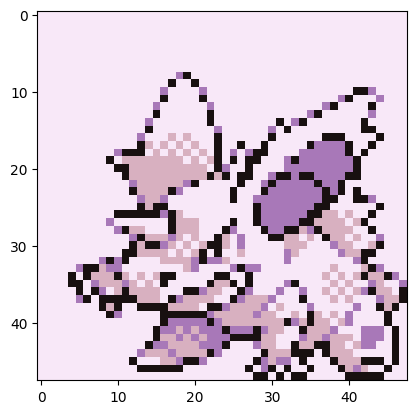

In [18]:
plt.imshow(intro[530:578, 984:984+48])

In [19]:
gengar = []
nidoran = []
for n in range(3):
    gengar.append(intro[472:472+56, 984+n*58:984+56+n*58, :3])
    nidoran.append(intro[530:530+48, 984+n*58:984+48+n*58, :3])
    gengar[n][gengar[n] == np.array([248, 232, 248])] = 255
    nidoran[n][nidoran[n] == np.array([248, 232, 248])] = 255

In [20]:
for n, image in enumerate(gengar):
    plt.imsave(f"assets/gengar{n}.png", image)
for n, image in enumerate(nidoran):
    plt.imsave(f"assets/nidorino{n}.png", image)

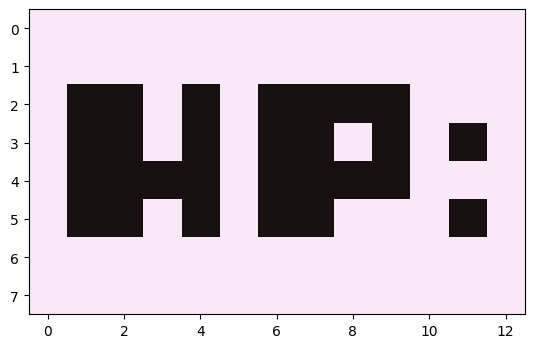

In [21]:
plt.imshow(battle[805+155:813+155, 192:205, :3])

In [22]:
text_box = battle[104:152, 8:168, :3]
text_box[text_box == 248] = 255
plt.imsave("assets/text_box.png", text_box)

arrow = battle[808:821, 187:264, :3]
arrow[arrow == np.array([248, 232, 248])] = 255
arrow[arrow == np.array([168,   0,  32])] = 255
arrow[arrow == np.array([255,  13,  19])] = 255
arrow[arrow == np.array([ 24,  16,  16])] = 0

hp = battle[805+155:813+155, 192:205, :3] # 8x13
hp[hp == np.array([248, 232, 248])] = 255


bar = []
for n in range(3):
    bar.append(battle[792+16*n:796+16*n, 360:410, :3])
    bar[n][bar[n] == np.array([248, 232, 248])] = 255
    plt.imsave(f"assets/bar{n}.png", bar[n])


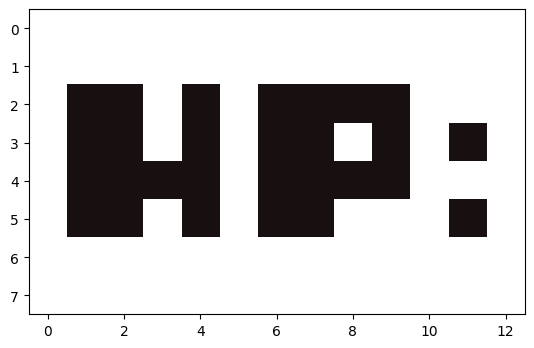

In [23]:
plt.imshow(hp)

In [24]:
gengar_name = (plt.imread("base/gengar_name.png")*255).astype(np.uint8)[::, ::, :3]
nidorino_name = (plt.imread("base/nidorino_name.png")*255).astype(np.uint8)[::, ::, :3]

In [25]:
print(gengar_name.shape)
print(nidorino_name.shape)

(8, 41, 3)
(7, 45, 3)


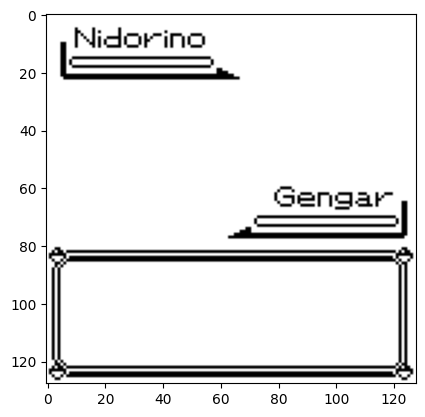

In [26]:
base = np.ones((128, 128, 3), dtype=np.uint8)*255
base[128-48:128, ::, ::] = text_box[::, :128, ::]
base[128-48:128, 100:129, ::] = text_box[::, 132:160, ::]
base[88:120, 8:120] = 255

base[10:10+13, 5:5+40] = arrow[:, :40]
base[10:10+13, 22:22+45] = arrow[:, 32:]

base[65:65+13, 85:85+40] = arrow[:, :40][:, ::-1]
base[65:65+13, 63:63+45] = arrow[:, 32:][:, ::-1]

base[5:5+7, 10:10+45] = nidorino_name
base[60:60+8, 79:79+41] = gengar_name


#bar
base[16:18, 8] = 0
base[16:18, 57] = 0
base[15, 9:57] = 0
base[18, 9:57] = 0
# base[15:15+4, 8:8+50] =     bar[1]  *1
base[71:73, 72] = 0
base[71:73, 121] = 0
base[70, 73:121] = 0
base[73, 73:121] = 0
# base[70:70+4, 72:72+50] =   bar[2]  *1

# base[24:24+56, 4:4+56] = gengar[0]  *1
# base[0:0+48, 78:78+48] = nidoran[0] *1

plt.imshow(base)

In [27]:
plt.imsave("assets/base.png", base)